In [1]:
import pandas as pd

# Define the column names for your dataset
column_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7','Class']

# Read the Excel file with skipping the header row
data = pd.read_excel('data/Raisin_Dataset.xlsx', names=column_names, header=None, skiprows=1)

labels = data['Class']  # Extract the "Class" column as labels
features = data.drop(columns=['Class'])  # Remove the "Class" column to get the features
np_arr_features = features.values
np_arr_labels = labels.values

# Assuming np_arr_labels is your NumPy array
labels_series = pd.Series(np_arr_labels)
# Use value_counts() on the Series
label_counts = labels_series.value_counts()


In [2]:
from src.src1 import Bays_Classification
accuracy1 = Bays_Classification(np_arr_features,labels,label_counts)
from src.src2 import K_NN_classification
accuracy2 = K_NN_classification(np_arr_features,np_arr_labels)
# MMD is minimum-mean-distance classifier
accuracy2_MMD = K_NN_classification(np_arr_features,np_arr_labels,'MMD')
from src.src3 import MLP_classification
accuracy3 =  MLP_classification(np_arr_features,np_arr_labels)
vec_accuracy = [accuracy1, accuracy2, accuracy2_MMD, accuracy3]

In [3]:
from src.src4 import feature_selection, np
num_feature = [4,5,6]
vec_accuracy_PCA = np.zeros((len(num_feature), 4))

for index, element in enumerate(num_feature):
    np_arr_features_PCA = feature_selection(np_arr_features,element)
    accuracy1_PCA = Bays_Classification(np_arr_features_PCA,labels,label_counts)
    accuracy2_PCA = K_NN_classification(np_arr_features_PCA,np_arr_labels)
    accuracy2_MMD_PCA = K_NN_classification(np_arr_features_PCA,np_arr_labels,'MMD')
    accuracy3_PCA =  MLP_classification(np_arr_features_PCA,np_arr_labels)
    vec_accuracy_PCA[index,:] = [accuracy1_PCA, accuracy2_PCA, accuracy2_MMD_PCA, accuracy3_PCA]

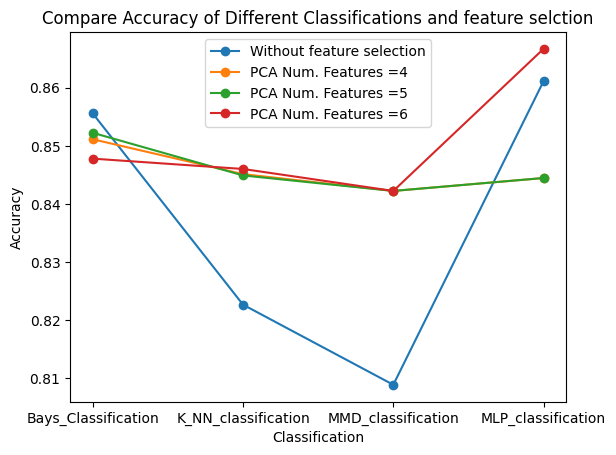

In [4]:
import matplotlib.pyplot as plt
vec_classification = ['Bays_Classification', 'K_NN_classification', 'MMD_classification', 'MLP_classification']
plt.plot(vec_classification, vec_accuracy, '-o')

for index, element in enumerate(num_feature):
    plt.plot(vec_classification, vec_accuracy_PCA[index], '-o')
    # plt.plot(vec_classification, vec_accuracy, '-o', color='green', markerfacecolor='orange', markersize=8)
    # plt.plot(vec_classification, vec_accuracy_PCA, '-o', color='blue', markerfacecolor='red', markersize=8)
    plt.xlabel('Classification')
    plt.ylabel('Accuracy')
    plt.title('Compare Accuracy of Different Classifications and feature selction')
plt.legend(['Without feature selection',f'PCA Num. Features ={num_feature[0]} ',
            f'PCA Num. Features ={num_feature[1]} ',f'PCA Num. Features ={num_feature[2]} '])
plt.show()
